## Data Gathering


#### Run this cell to connect to your GIS and get started:

In [1]:
from arcgis.gis import GIS
gis = GIS("home")

/opt/conda/lib/python3.7/site-packages/arcgis/gis/__init__.py:575: UserWarning:

You are logged on as vanveghd_McMaster with an administrator role, proceed with caution.



#### Now you are ready to start!

In [2]:
import pandas as pd
from datetime import datetime, date, time, timedelta

In [3]:
dt = date.today()
tdy = dt.strftime("%Y%m%d")
ytdy = date.strftime(date.today() - timedelta(days=1), '%Y%m%d')
ytdy2 = date.strftime(date.today() - timedelta(days=2), '%Y%m%d')
ytdy3 = date.strftime(date.today() - timedelta(days=3), '%Y%m%d')
ytdy4 = date.strftime(date.today() - timedelta(days=4), '%Y%m%d')
ytdy5 = date.strftime(date.today() - timedelta(days=5), '%Y%m%d')
ytdy6 = date.strftime(date.today() - timedelta(days=6), '%Y%m%d')

In [4]:
from arcgis.mapping import WebMap
gis = GIS("https://mcmaster.maps.arcgis.com/home/item.html?id=b5beb40e17d94b5899702dbfd833600a", "USERNAME", "PASSWORD")

In [5]:
from arcgis.features import FeatureLayer
wm_item = gis.content.get('b5beb40e17d94b5899702dbfd833600a')
WM = WebMap(wm_item)



In [6]:
dataTODAY = pd.read_csv("https://cwfis.cfs.nrcan.gc.ca/downloads/hotspots/" + tdy + ".csv")
dataYDY = pd.read_csv("https://cwfis.cfs.nrcan.gc.ca/downloads/hotspots/" + ytdy + ".csv")
dataYDY2 = pd.read_csv("https://cwfis.cfs.nrcan.gc.ca/downloads/hotspots/" + ytdy2 + ".csv")
dataYDY3 = pd.read_csv("https://cwfis.cfs.nrcan.gc.ca/downloads/hotspots/" + ytdy3 + ".csv")
dataYDY4 = pd.read_csv("https://cwfis.cfs.nrcan.gc.ca/downloads/hotspots/" + ytdy4 + ".csv")
dataYDY5 = pd.read_csv("https://cwfis.cfs.nrcan.gc.ca/downloads/hotspots/" + ytdy5 + ".csv")
dataYDY6 = pd.read_csv("https://cwfis.cfs.nrcan.gc.ca/downloads/hotspots/" + ytdy6 + ".csv")

In [7]:
dataTODAY = dataTODAY.rename(columns={" lon": "Longitude"})
dataTODAY = dataTODAY.rename(columns={"lat": "Latitude"})
dataYDY = dataYDY.rename(columns={" lon": "Longitude"})
dataYDY = dataYDY.rename(columns={"lat": "Latitude"})
dataYDY2 = dataYDY2.rename(columns={" lon": "Longitude"})
dataYDY2 = dataYDY2.rename(columns={"lat": "Latitude"})
dataYDY3 = dataYDY3.rename(columns={" lon": "Longitude"})
dataYDY3 = dataYDY3.rename(columns={"lat": "Latitude"})
dataYDY4 = dataYDY4.rename(columns={" lon": "Longitude"})
dataYDY4 = dataYDY4.rename(columns={"lat": "Latitude"})
dataYDY5 = dataYDY5.rename(columns={" lon": "Longitude"})
dataYDY5 = dataYDY5.rename(columns={"lat": "Latitude"})
dataYDY6 = dataYDY6.rename(columns={" lon": "Longitude"})
dataYDY6 = dataYDY6.rename(columns={"lat": "Latitude"})

In [8]:
from pandas import DataFrame
dataTODAY = dataTODAY.rename(columns={' sensor': 'Satellite Sensor', ' fwi': 'Fire Weather Index', ' rep_date': 'Date', ' estarea': 'Area', ' source': 'Data Source'})
dataYDY = dataYDY.rename(columns={' sensor': 'Satellite Sensor', ' fwi': 'Fire Weather Index', ' rep_date': 'Date', ' estarea': 'Area', ' source': 'Data Source'})
dataYDY2 = dataYDY2.rename(columns={' sensor': 'Satellite Sensor', ' fwi': 'Fire Weather Index', ' rep_date': 'Date', ' estarea': 'Area', ' source': 'Data Source'})
dataYDY3 = dataYDY3.rename(columns={' sensor': 'Satellite Sensor', ' fwi': 'Fire Weather Index', ' rep_date': 'Date', ' estarea': 'Area', ' source': 'Data Source'})
dataYDY4 = dataYDY4.rename(columns={' sensor': 'Satellite Sensor', ' fwi': 'Fire Weather Index', ' rep_date': 'Date', ' estarea': 'Area', ' source': 'Data Source'})
dataYDY5 = dataYDY5.rename(columns={' sensor': 'Satellite Sensor', ' fwi': 'Fire Weather Index', ' rep_date': 'Date', ' estarea': 'Area', ' source': 'Data Source'})
dataYDY6 = dataYDY6.rename(columns={' sensor': 'Satellite Sensor', ' fwi': 'Fire Weather Index', ' rep_date': 'Date', ' estarea': 'Area', ' source': 'Data Source'})
dataTODAY = dataTODAY.drop(labels=[' fuel', ' ros', ' sfc', ' tfc', ' bfc', ' hfi'], axis=1)
dataYDY = dataYDY.drop(labels=[' fuel', ' ros', ' sfc', ' tfc', ' bfc', ' hfi'], axis=1)
dataYDY2 = dataYDY2.drop(labels=[' fuel', ' ros', ' sfc', ' tfc', ' bfc', ' hfi'], axis=1)
dataYDY3 = dataYDY3.drop(labels=[' fuel', ' ros', ' sfc', ' tfc', ' bfc', ' hfi'], axis=1)
dataYDY4 = dataYDY4.drop(labels=[' fuel', ' ros', ' sfc', ' tfc', ' bfc', ' hfi'], axis=1)
dataYDY5 = dataYDY5.drop(labels=[' fuel', ' ros', ' sfc', ' tfc', ' bfc', ' hfi'], axis=1)
dataYDY6 = dataYDY6.drop(labels=[' fuel', ' ros', ' sfc', ' tfc', ' bfc', ' hfi'], axis=1)

In [9]:
weekDATA = pd.concat([dataTODAY, dataYDY, dataYDY2, dataYDY3, dataYDY4, dataYDY5, dataYDY6])
weekDATA.columns


Index(['Latitude', 'Longitude', 'Date', 'Data Source', 'Satellite Sensor',
       'Fire Weather Index', 'Area'],
      dtype='object')

In [10]:
import numpy as np
weekDATA['Radius'] = np.sqrt(weekDATA['Area']/3.14159)
weekDATA['West'] = weekDATA['Longitude'] < -89
weekDATA['North'] = weekDATA['Latitude'] > 42
weekDATA['NorthNorth'] = weekDATA['Latitude'] > 48
westData = weekDATA[weekDATA['West'] == True]
westData = westData[westData['NorthNorth'] == True]
eastData = weekDATA[weekDATA['West'] == False]
eastData = eastData[eastData['North'] == True]
finalDATA = pd.concat([westData, eastData])

In [11]:
from arcgis.features import GeoAccessor
spatialDataWEEK = GeoAccessor.from_xy(finalDATA, x_column='Longitude', y_column='Latitude', sr=4326)

In [12]:
from arcgis import features
lyr = spatialDataWEEK.spatial.to_featurelayer(str(tdy), folder='App Challenge 2022')
bufflyr = features.use_proximity.create_buffers(lyr, field='Radius', units='Kilometers', dissolve_type='Dissolve', output_name=str(tdy) + ' Hot Spot Burn Zones')

In [13]:
from arcgis.mapping import WebMap
gis = GIS("https://mcmaster.maps.arcgis.com/home/item.html?id=b5beb40e17d94b5899702dbfd833600a", "USERNAME", "PASSWORD")

In [14]:
wm_item = gis.content.get('b5beb40e17d94b5899702dbfd833600a')
WM = WebMap(wm_item)

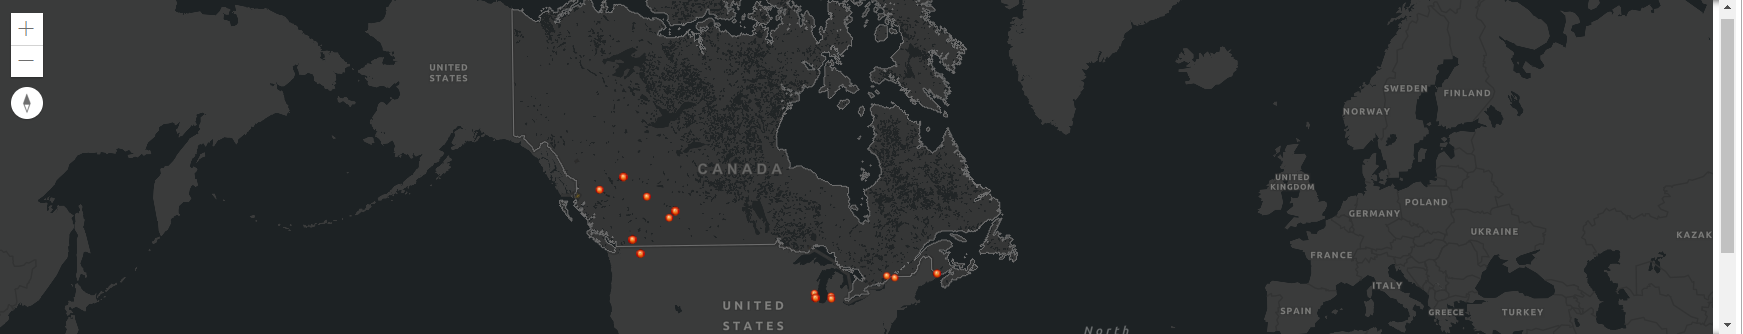

In [15]:
WM.remove_layer(WM.layers[0])
WM.remove_layer(WM.layers[0])
lyr.update(item_properties={'access': 'public'})
bufflyr.update(item_properties={'access': 'public'})
WM.add_layer(lyr, {'title': 'Fire Hot Spot', 'color': [255,0,0]})
WM.add_layer(bufflyr, {'title': 'Fire Hot Spot Burn Zones', 'opacity':0.3})
WM.update()
WM

# from IPython.display import Image
# Image('MapViewerExample.png')